<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8-bal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-3-r8.csv?token=AKVFSOHNWQBLFB5RERTWCD26ZMFPI')
print(df.shape)
df

(44155, 30)


timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0             96        0       3  ...             27                 9       1
1            118        0       3  ...             27                 9       1
2            134        2       0  ...             85               100       1
3            135        2       0  ...             85               100       1
4            136        2       0  ...             85               100       1
...          ...      ...     ...  ...            ...               ...     ...
44150    3267901        2       0  ...             95               100       1
44151    3267902        2       0  ...             95               100       1
44152    3267903        2       0  ...             95               100       1
44153    3267904        2       0  ...             95               100       1
44154    3267908        2       0  ...             95               100       1

[44155 rows x 30 columns]

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-1-r8.csv?token=AKVFSOCCRVMWCBDFYTFB5BK6ZMFQ2',nrows = 40000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-6-r8.csv?token=AKVFSOBLJMRQZCMFRUTCBZC6ZMFQ6',nrows = 40000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-9-r8.csv?token=AKVFSOBGRCA74DHKHRXKOHC6ZMFRC',nrows = 40000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-14-r8.csv?token=AKVFSOCZJJ77NL3M67VJK726ZMFRE',nrows = 40000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-5-r8.csv?token=AKVFSOEOK6RYMTSXOKANGZ26ZMFUI')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-12-r8.csv?token=AKVFSOHJ2WJTZLJK74V73IK6ZMFUK')
#df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-15-r8.csv?token=AKVFSOFE5GCKVHG6PLVJZUK6ZMFUO')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
#print(df13.shape)

(40000, 30)
(40000, 30)
(40000, 30)
(40000, 30)
(44430, 30)
(69718, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
#df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0              93        0       3  ...             27                 9       1
1              96        0       3  ...             27                 9       1
2              96        0       3  ...             27                 9       0
3              96        0       3  ...             27                 9       0
4              96        0       3  ...             27                 9       0
...           ...      ...     ...  ...            ...               ...     ...
318298    3272369        1       3  ...             85               100       1
318299    3272370        1       3  ...             85               100       1
318300    3272371        1       3  ...             85               100       1
318301    3272372        1       3  ...             85               100       1
318302    3272376        1       3  ...             85               100       1

[318303 rows x 30 columns]

In [0]:
df.shape

(318303, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-2-r8.csv?token=AKVFSOBR73XGR23NLW7V4FK6ZMFXS',nrows = 30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-5-r8.csv?token=AKVFSODPC3JODZJSJN7QNIK6ZMFXM',nrows = 30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-10-r8.csv?token=AKVFSOAKOD7VNHP6RSW4W6K6ZMFXW',nrows = 30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-12-r8.csv?token=AKVFSODVWB6GBNV7ZHNOFHK6ZMFX2',nrows = 30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-13-r8.csv?token=AKVFSOENFZHL4ATYOOLLPVC6ZMFX6',nrows = 30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-malicious-n-0-3-m-15-r8.csv?token=AKVFSOCW4ZLXIZ627I3BKG26ZMFYA',nrows = 30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r8/2-fft-normal-n-0-10-r8.csv?token=AKVFSOGVNHJOWAI33IVYATS6ZMF6I',nrows = 30000)

print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0             96        0       3  ...             27                 9       0
1            118        0       3  ...             27                 9       0
2            134        2       0  ...             85               100       0
3            135        2       0  ...             85               100       0
4            136        2       0  ...             85               100       0
...          ...      ...     ...  ...            ...               ...     ...
29995    1964472        0       3  ...             27                45       0
29996    1964479        0       3  ...             27                45       0
29997    1964486        0       3  ...             27                45       0
29998    1964493        0       3  ...             27                45       0
29999    1964500        0       3  ...             27                45       0

[30000 rows x 30 columns]

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

outport    inport  ...  vnet_vc_cc_index    target
outport                     1.000000 -0.412223  ...          0.604928  0.004354
inport                     -0.412223  1.000000  ...         -0.367535  0.102732
cache_coherence_type       -0.261040  0.081274  ...         -0.010905  0.001106
flit_id                    -0.014929 -0.017558  ...          0.291919  0.000910
flit_type                   0.023263  0.027351  ...         -0.454865 -0.001409
vnet                        0.656237 -0.369421  ...          0.925507  0.082539
vc                          0.659306 -0.480258  ...          0.890234  0.060805
traversal_id               -0.037695  0.021396  ...         -0.043008  0.004918
hop_count                   0.418431  0.288710  ...          0.268056 -0.042689
current_hop                -0.209111  0.804030  ...         -0.258197  0.043296
hop_percentage             -0.581877  0.868070  ...         -0.503320  0.036086
enqueue_time               -0.509761  0.632257  ...         -0.559910 -0.030034
packet_count_decr          -0.118339 -0.000307  ...         -0.078108 -0.037838
packet_count_incr           0.091430 -0.197775  ...          0.099380 -0.037798
max_packet_count           -0.016877 -0.124224  ...          0.013339 -0.047435
packet_count_index         -0.024187 -0.121434  ...         -0.003814 -0.064129
packet_max_index           -0.031804 -0.103432  ...         -0.014215 -0.076589
port_index                  0.489109  0.426551  ...          0.227260  0.098627
cache_coherence_flit_index -0.212157  0.051269  ...          0.125480 -0.015575
flit_index                 -0.142430  0.037193  ...          0.059027 -0.007361
traversal_index            -0.127199  0.037267  ...          0.014563 -0.004456
cache_coherence_vnet_index  0.353302 -0.258583  ...          0.822989  0.075286
vnet_vc_index               0.659277 -0.436495  ...          0.912294  0.068114
vnet_vc_cc_index            0.604928 -0.367535  ...          1.000000  0.090037
target                      0.004354  0.102732  ...          0.090037  1.000000

[25 rows x 25 columns]

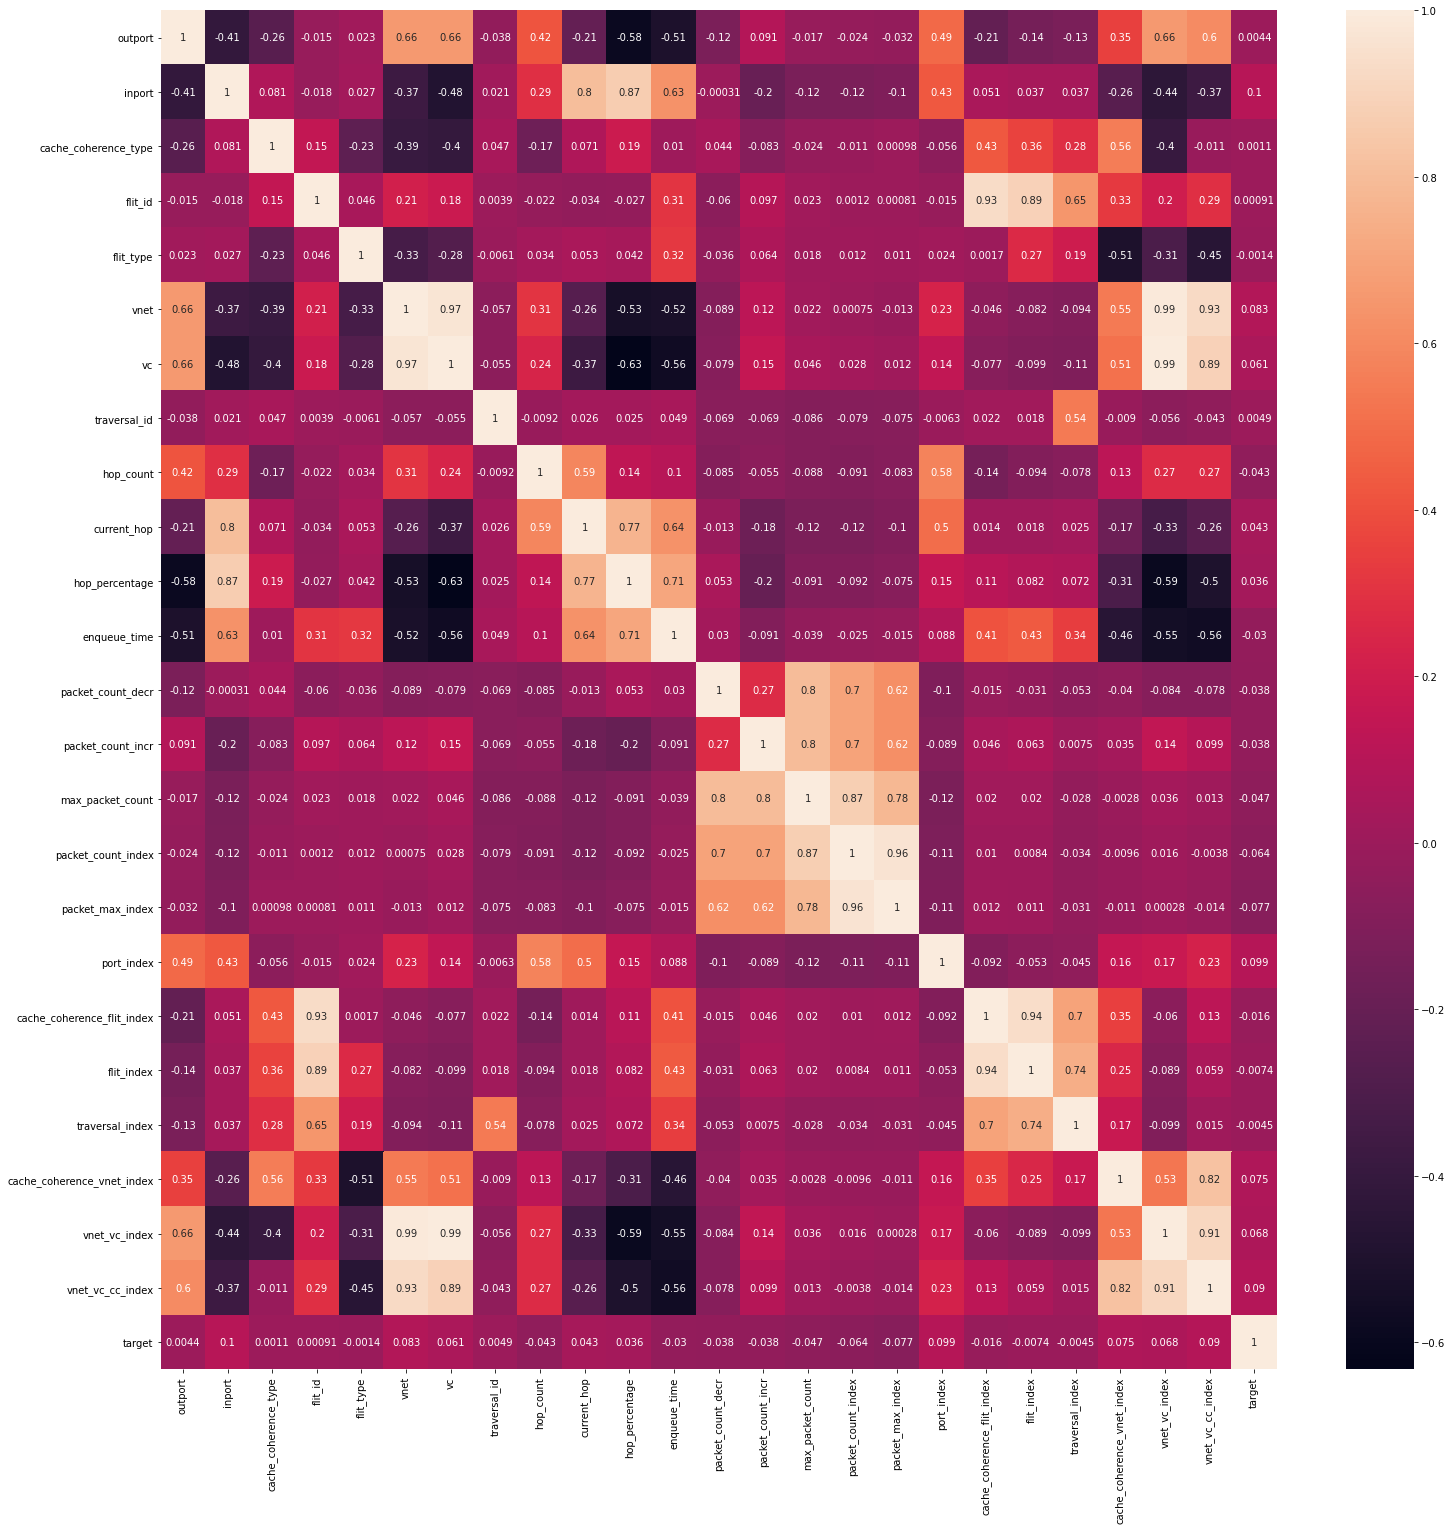

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0             0       3  ...             27                 9
1             0       3  ...             27                 9
2             0       3  ...             27                 9
3             0       3  ...             27                 9
4             0       3  ...             27                 9
...         ...     ...  ...            ...               ...
318298        1       3  ...             85               100
318299        1       3  ...             85               100
318300        1       3  ...             85               100
318301        1       3  ...             85               100
318302        1       3  ...             85               100

[318303 rows x 24 columns]

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0       0.000000     1.0  ...       0.000000               0.0
1       0.000000     1.0  ...       0.000000               0.0
2       0.000000     1.0  ...       0.000000               0.0
3       0.000000     1.0  ...       0.000000               0.0
4       0.000000     1.0  ...       0.000000               0.0
...          ...     ...  ...            ...               ...
318298  0.333333     1.0  ...       0.794521               1.0
318299  0.333333     1.0  ...       0.794521               1.0
318300  0.333333     1.0  ...       0.794521               1.0
318301  0.333333     1.0  ...       0.794521               1.0
318302  0.333333     1.0  ...       0.794521               1.0

[318303 rows x 24 columns]

In [0]:
train_X[train_X.duplicated()].shape

(6836, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000     1.0  ...       0.000000          0.000000
1      0.000000     1.0  ...       0.000000          0.000000
2      0.666667     0.0  ...       0.794521          1.000000
3      0.666667     0.0  ...       0.794521          1.000000
4      0.666667     0.0  ...       0.794521          1.000000
...         ...     ...  ...            ...               ...
29995  0.000000     1.0  ...       0.000000          0.395604
29996  0.000000     1.0  ...       0.000000          0.395604
29997  0.000000     1.0  ...       0.000000          0.395604
29998  0.000000     1.0  ...       0.000000          0.395604
29999  0.000000     1.0  ...       0.000000          0.395604

[30000 rows x 24 columns]

In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000     1.0  ...       0.000000          0.000000
1      0.000000     1.0  ...       0.000000          0.000000
2      0.666667     0.0  ...       0.794521          1.000000
3      0.666667     0.0  ...       0.794521          1.000000
4      0.666667     0.0  ...       0.794521          1.000000
...         ...     ...  ...            ...               ...
29995  1.000000     0.0  ...       0.863014          1.000000
29996  1.000000     0.0  ...       0.863014          1.000000
29997  1.000000     0.0  ...       0.863014          1.000000
29998  0.000000     1.0  ...       0.000000          0.395604
29999  0.000000     1.0  ...       0.000000          0.395604

[30000 rows x 24 columns]

In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


outport    inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000  1.000000  ...       0.000000          0.000000
1      0.000000  0.666667  ...       0.000000          0.000000
2      0.666667  0.000000  ...       0.794521          1.000000
3      0.666667  0.000000  ...       0.794521          1.000000
4      0.666667  0.000000  ...       0.794521          1.000000
...         ...       ...  ...            ...               ...
29995  0.666667  0.000000  ...       0.931507          1.000000
29996  0.666667  0.000000  ...       0.931507          1.000000
29997  0.666667  0.000000  ...       0.931507          1.000000
29998  0.666667  0.000000  ...       0.082192          0.197802
29999  0.666667  0.000000  ...       0.931507          1.000000

[30000 rows x 24 columns]

In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000     1.0  ...       0.000000          0.000000
1      0.333333     1.0  ...       0.794521          1.000000
2      0.333333     1.0  ...       0.794521          1.000000
3      0.333333     1.0  ...       0.794521          1.000000
4      0.333333     1.0  ...       0.794521          1.000000
...         ...     ...  ...            ...               ...
29995  0.666667     0.0  ...       0.794521          1.000000
29996  0.666667     0.0  ...       0.794521          1.000000
29997  0.666667     0.0  ...       0.794521          1.000000
29998  0.666667     0.0  ...       0.794521          1.000000
29999  0.666667     0.0  ...       0.041096          0.197802

[30000 rows x 24 columns]

In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


outport    inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000  1.000000  ...       0.000000          0.000000
1      0.000000  0.333333  ...       0.000000          0.000000
2      0.666667  0.000000  ...       0.794521          1.000000
3      0.666667  0.000000  ...       0.794521          1.000000
4      0.666667  0.000000  ...       0.794521          1.000000
...         ...       ...  ...            ...               ...
29995  0.000000  0.666667  ...       0.000000          0.494505
29996  1.000000  0.333333  ...       0.041096          0.000000
29997  0.000000  0.666667  ...       0.000000          0.494505
29998  0.000000  0.666667  ...       0.000000          0.494505
29999  0.000000  0.666667  ...       0.041096          0.098901

[30000 rows x 24 columns]

In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


outport    inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000  1.000000  ...       0.000000          0.000000
1      0.000000  0.333333  ...       0.000000          0.000000
2      0.666667  0.000000  ...       0.794521          1.000000
3      0.666667  0.000000  ...       0.794521          1.000000
4      0.666667  0.000000  ...       0.794521          1.000000
...         ...       ...  ...            ...               ...
29995  0.666667  0.000000  ...       0.931507          1.000000
29996  0.666667  0.000000  ...       0.931507          1.000000
29997  0.666667  0.000000  ...       0.931507          1.000000
29998  0.666667  0.000000  ...       0.931507          1.000000
29999  0.333333  1.000000  ...       0.000000          0.395604

[30000 rows x 24 columns]

In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(151, 24)


outport    inport  ...  vnet_vc_index  vnet_vc_cc_index
0      0.000000  0.666667  ...       0.000000          0.000000
1      0.000000  1.000000  ...       0.000000          0.000000
2      0.666667  0.000000  ...       0.794521          1.000000
3      0.666667  0.000000  ...       0.794521          1.000000
4      0.666667  0.000000  ...       0.794521          1.000000
...         ...       ...  ...            ...               ...
29995  0.666667  0.000000  ...       0.931507          1.000000
29996  1.000000  0.333333  ...       0.000000          0.593407
29997  1.000000  0.666667  ...       0.794521          1.000000
29998  1.000000  0.666667  ...       0.794521          1.000000
29999  1.000000  0.666667  ...       0.794521          1.000000

[30000 rows x 24 columns]

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    160000
1    158303
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
17                  port_index  1444.228524
5                         vnet  1053.338655
1                       inport   860.445140
22               vnet_vc_index   590.850047
6                           vc   419.576432
23            vnet_vc_cc_index   345.549922
16            packet_max_index   197.865663
15          packet_count_index   165.213810
14            max_packet_count   147.582891
9                  current_hop   126.919622
21  cache_coherence_vnet_index   116.366844
10              hop_percentage   107.636586
13           packet_count_incr    75.139062
12           packet_count_decr    72.456755
8                    hop_count    66.682846
11                enqueue_time    39.690024
18  cache_coherence_flit_index    12.107778


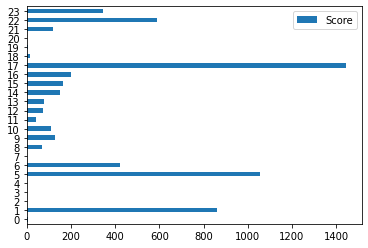

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 61.363797016988556
Test Prediction  60.947833053203695


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.36666666666666


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  52.656666666666666


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  60.57666666666667


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  41.60333333333333


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  59.233333333333334


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.31


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  56.97


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

feature  importance
15          packet_count_index    5.634636
5                         vnet    2.062914
1                       inport    1.949246
9                  current_hop    1.744750
4                    flit_type    1.585886
23            vnet_vc_cc_index    1.345689
18  cache_coherence_flit_index    0.890756
21  cache_coherence_vnet_index    0.739651
6                           vc    0.513211
7                 traversal_id    0.091537
12           packet_count_decr   -0.028496
17                  port_index   -0.030295
20             traversal_index   -0.121364
13           packet_count_incr   -0.151521
2         cache_coherence_type   -0.177200
14            max_packet_count   -0.180017
0                      outport   -0.389847
19                  flit_index   -0.499957
3                      flit_id   -0.817189
10              hop_percentage   -1.048355
11                enqueue_time   -1.096537
22               vnet_vc_index   -2.157361
8                    hop_count   -2.803265
16            packet_max_index  -11.204777

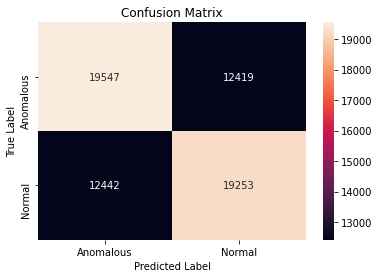

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61     31966
           1       0.61      0.61      0.61     31695

    accuracy                           0.61     63661
   macro avg       0.61      0.61      0.61     63661
weighted avg       0.61      0.61      0.61     63661



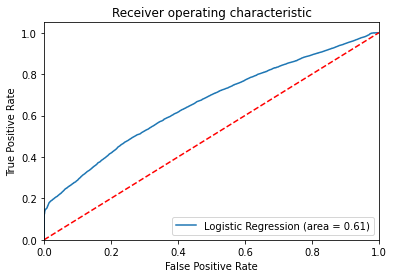

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

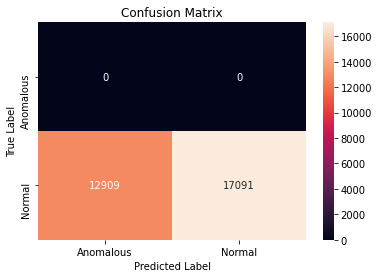

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.73     30000

    accuracy                           0.57     30000
   macro avg       0.50      0.28      0.36     30000
weighted avg       1.00      0.57      0.73     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 83.90917444883405
Test Prediction  74.89986019698088


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  69.08


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.373333333333335


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  62.870000000000005


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  35.406666666666666


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  62.01333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  71.00999999999999


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  46.86333333333334


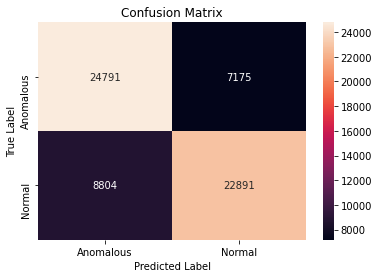

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     31966
           1       0.76      0.72      0.74     31695

    accuracy                           0.75     63661
   macro avg       0.75      0.75      0.75     63661
weighted avg       0.75      0.75      0.75     63661



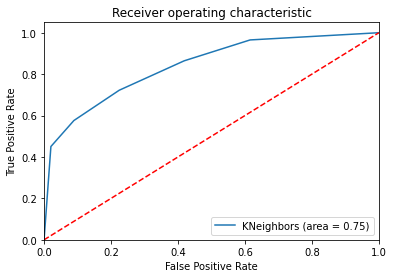

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

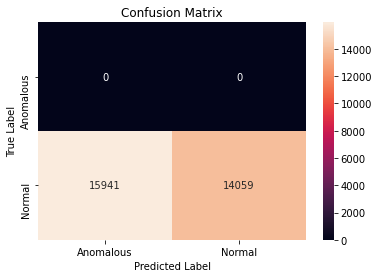

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.47      0.64     30000

    accuracy                           0.47     30000
   macro avg       0.50      0.23      0.32     30000
weighted avg       1.00      0.47      0.64     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 53.856001759332706
Test Prediction Score 53.49586088814188


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 35.49


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  32.06333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  35.03333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.49333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.96666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  40.223333333333336


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  71.77


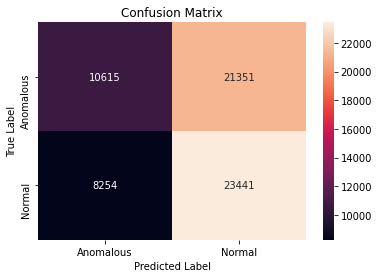

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.33      0.42     31966
           1       0.52      0.74      0.61     31695

    accuracy                           0.53     63661
   macro avg       0.54      0.54      0.52     63661
weighted avg       0.54      0.53      0.51     63661



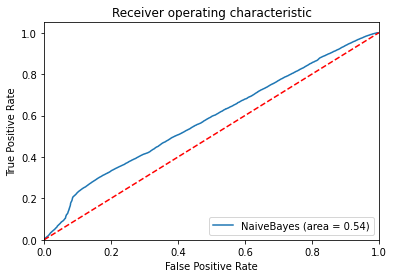

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 203713 samples, validate on 50929 samples
Epoch 1/10
203713/203713 [==============================] - 8s 38us/step - loss: 0.2284 - accuracy: 0.6007 - val_loss: 0.2223 - val_accuracy: 0.6131
Epoch 2/10
203713/203713 [==============================] - 7s 37us/step - loss: 0.2206 - accuracy: 0.6125 - val_loss: 0.2179 - val_accuracy: 0.6147
Epoch 3/10
203713/203713 [==============================] - 8s 37us/step - loss: 0.2180 - accuracy: 0.6086 - val_loss: 0.2160 - val_accuracy: 0.6037
Epoch 4/10
203713/203713 [==============================] - 8s 41us/step - loss: 0.2163 - accuracy: 0.6035 - val_loss: 0.2150 - val_accuracy: 0.6023
Epoch 5/10
203713/203713 [==============================] - 8s 38us/step - loss: 0.2155 - accuracy: 0.6030 - val_loss: 0.2145 - val_accuracy: 0.6047
Epoch 6/10
203713/203713 [==============================] - 8s 37us/step - loss: 0.2151 - accuracy: 0.6036 - val_loss: 0.2144 - val_accuracy: 0.6027
Epoch 7/10
203713/203713 [=============================

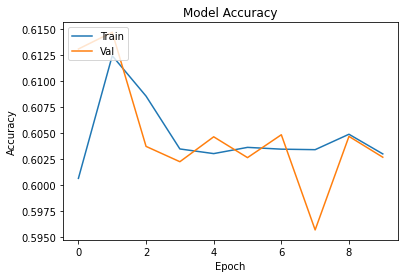

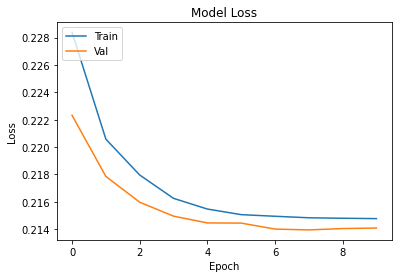

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.12%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.19%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.85%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.22%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.46%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.23%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.19%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 2.21%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 203713 samples, validate on 50929 samples
Epoch 1/30
203713/203713 [==============================] - 8s 37us/step - loss: 0.2507 - accuracy: 0.4933 - val_loss: 0.2499 - val_accuracy: 0.5033
Epoch 2/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2499 - accuracy: 0.5028 - val_loss: 0.2498 - val_accuracy: 0.5008
Epoch 3/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2498 - accuracy: 0.5015 - val_loss: 0.2497 - val_accuracy: 0.5033
Epoch 4/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2496 - accuracy: 0.5022 - val_loss: 0.2495 - val_accuracy: 0.5012
Epoch 5/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2495 - accuracy: 0.5054 - val_loss: 0.2493 - val_accuracy: 0.5069
Epoch 6/30
203713/203713 [==============================] - 7s 37us/step - loss: 0.2492 - accuracy: 0.5124 - val_loss: 0.2490 - val_accuracy: 0.5145
Epoch 7/30
203713/203713 [=============================

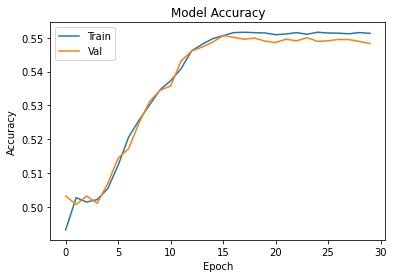

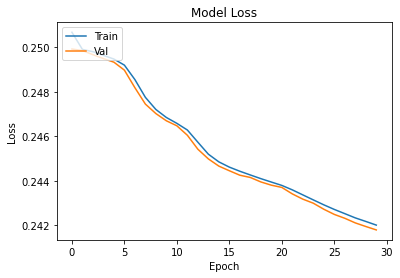

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.74%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 23.89%
accuracy: 19.84%
accuracy: 27.25%
accuracy: 13.53%
accuracy: 25.61%
accuracy: 26.91%
accuracy: 68.66%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 203713 samples, validate on 50929 samples
Epoch 1/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2501 - accuracy: 0.4981 - val_loss: 0.2492 - val_accuracy: 0.5115
Epoch 2/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2476 - accuracy: 0.5268 - val_loss: 0.2449 - val_accuracy: 0.5551
Epoch 3/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2414 - accuracy: 0.5622 - val_loss: 0.2376 - val_accuracy: 0.5720
Epoch 4/30
203713/203713 [==============================] - 8s 37us/step - loss: 0.2336 - accuracy: 0.5829 - val_loss: 0.2291 - val_accuracy: 0.5994
Epoch 5/30
203713/203713 [==============================] - 8s 41us/step - loss: 0.2271 - accuracy: 0.5965 - val_loss: 0.2251 - val_accuracy: 0.6028
Epoch 6/30
203713/203713 [==============================] - 7s 36us/step - loss: 0.2248 - accuracy: 0.5992 - val_loss: 0.2237 - val_accuracy: 0.6027
Epoch 7/30
203713/203713 [=============================

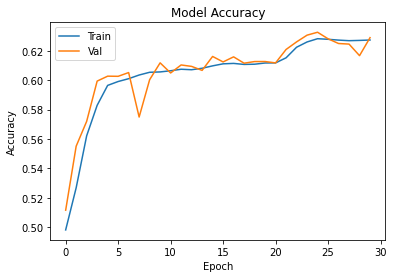

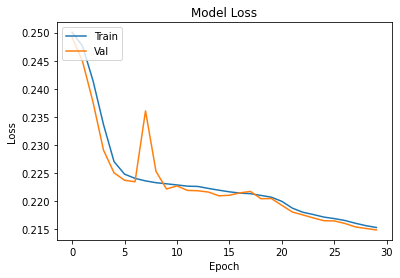

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.61%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.37%
accuracy: 71.23%
accuracy: 74.12%
accuracy: 41.92%
accuracy: 73.41%
accuracy: 75.13%
accuracy: 31.61%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 203713 samples, validate on 50929 samples
Epoch 1/100
203713/203713 [==============================] - 14s 69us/step - loss: 0.2074 - accuracy: 0.6375 - val_loss: 0.1981 - val_accuracy: 0.6260
Epoch 2/100
203713/203713 [==============================] - 14s 66us/step - loss: 0.1952 - accuracy: 0.6576 - val_loss: 0.1865 - val_accuracy: 0.6751
Epoch 3/100
203713/203713 [==============================] - 14s 66us/step - loss: 0.1917 - accuracy: 0.6629 - val_loss: 0.1867 - val_accuracy: 0.6616
Epoch 4/100
203713/203713 [==============================] - 13s 65us/step - loss: 0.1902 - accuracy: 0.6659 - val_loss: 0.1857 - val_accuracy: 0.6776
Epoch 5/100
203713/203713 [==============================] - 13s 66us/step - loss: 0.1894 - accuracy: 0.6676 - val_loss: 0.1853 - val_accuracy: 0.6789
Epoch 6/100
203713/203713 [==============================] - 13s 65us/step - loss: 0.1891 - accuracy: 0.6671 - val_loss: 0.1850 - val_accuracy: 0.6817
Epoch 7/100
203713/203713 [================

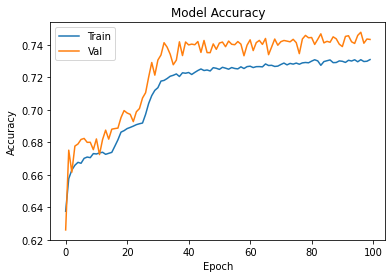

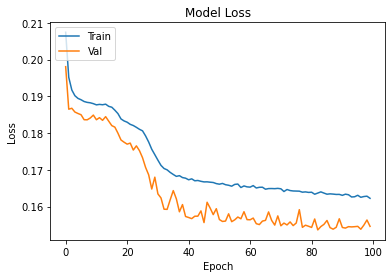

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.83%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.48%
accuracy: 61.20%
accuracy: 68.54%
accuracy: 34.46%
accuracy: 65.06%
accuracy: 79.23%
accuracy: 43.96%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 203713 samples, validate on 50929 samples
Epoch 1/50
203713/203713 [==============================] - 15s 75us/step - loss: 0.2100 - accuracy: 0.6273 - val_loss: 0.2179 - val_accuracy: 0.6248
Epoch 2/50
203713/203713 [==============================] - 15s 74us/step - loss: 0.1991 - accuracy: 0.6487 - val_loss: 0.1919 - val_accuracy: 0.6621
Epoch 3/50
203713/203713 [==============================] - 15s 74us/step - loss: 0.1949 - accuracy: 0.6561 - val_loss: 0.1878 - val_accuracy: 0.6731
Epoch 4/50
203713/203713 [==============================] - 17s 84us/step - loss: 0.1933 - accuracy: 0.6591 - val_loss: 0.1872 - val_accuracy: 0.6751
Epoch 5/50
203713/203713 [==============================] - 18s 87us/step - loss: 0.1925 - accuracy: 0.6597 - val_loss: 0.2001 - val_accuracy: 0.6515
Epoch 6/50
203713/203713 [==============================] - 16s 77us/step - loss: 0.1919 - accuracy: 0.6612 - val_loss: 0.1862 - val_accuracy: 0.6743
Epoch 7/50
203713/203713 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.18%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.92%
accuracy: 48.99%
accuracy: 56.07%
accuracy: 35.89%
accuracy: 49.25%
accuracy: 64.95%
accuracy: 51.24%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 93.12407222689109
Test Prediction Score 88.77648795966134


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 63.583333333333336
Test Prediction Score 51.70666666666667
Test Prediction Score 54.41666666666667
Test Prediction Score 27.973333333333333
Test Prediction Score 51.92
Test Prediction Score 63.32
Test Prediction Score 48.21333333333334


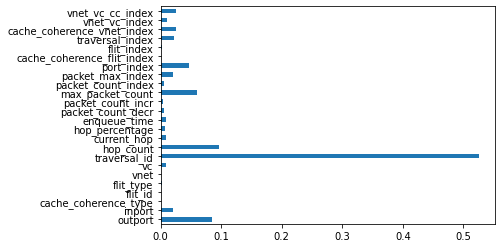

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

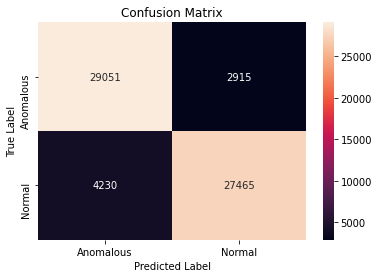

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     31966
           1       0.90      0.87      0.88     31695

    accuracy                           0.89     63661
   macro avg       0.89      0.89      0.89     63661
weighted avg       0.89      0.89      0.89     63661



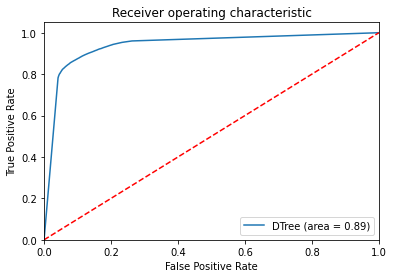

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.02013022203721
Test Prediction Score 90.30018378599142


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 63.31
Test Prediction Score 51.00666666666667
Test Prediction Score 55.35333333333333
Test Prediction Score 27.62
Test Prediction Score 48.24666666666666
Test Prediction Score 63.26666666666667
Test Prediction Score 46.77


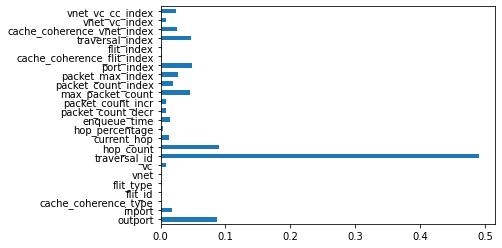

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

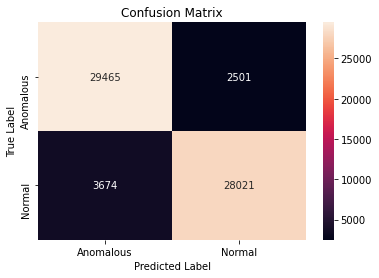

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     31966
           1       0.92      0.88      0.90     31695

    accuracy                           0.90     63661
   macro avg       0.90      0.90      0.90     63661
weighted avg       0.90      0.90      0.90     63661



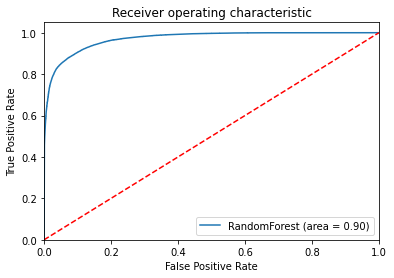

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.1823815395732
Test Prediction Score 93.82981731358288


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 61.89333333333333
Test Prediction Score 50.22
Test Prediction Score 55.74
Test Prediction Score 26.886666666666663
Test Prediction Score 50.05333333333334
Test Prediction Score 63.18333333333334
Test Prediction Score 44.10666666666667


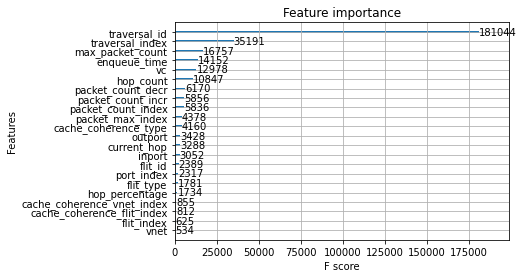

In [0]:
plot_importance(xgbc)
plt.show()

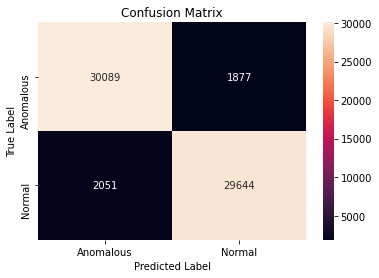

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     31966
           1       0.94      0.94      0.94     31695

    accuracy                           0.94     63661
   macro avg       0.94      0.94      0.94     63661
weighted avg       0.94      0.94      0.94     63661



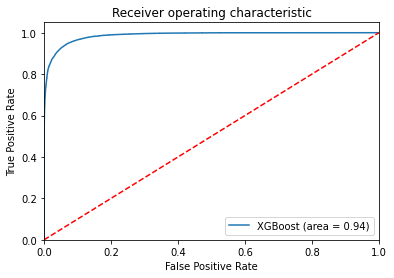

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.32835902953951
Test Prediction Score 81.81304095128887


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 68.19666666666667
Test Prediction Score 55.64333333333333
Test Prediction Score 59.31333333333333
Test Prediction Score 30.25333333333333
Test Prediction Score 54.156666666666666
Test Prediction Score 69.59
Test Prediction Score 44.026666666666664


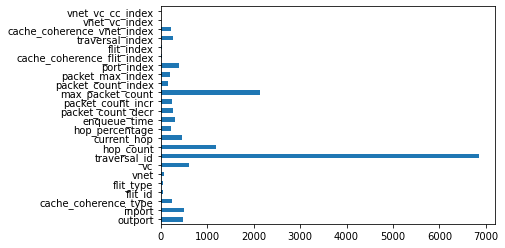

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

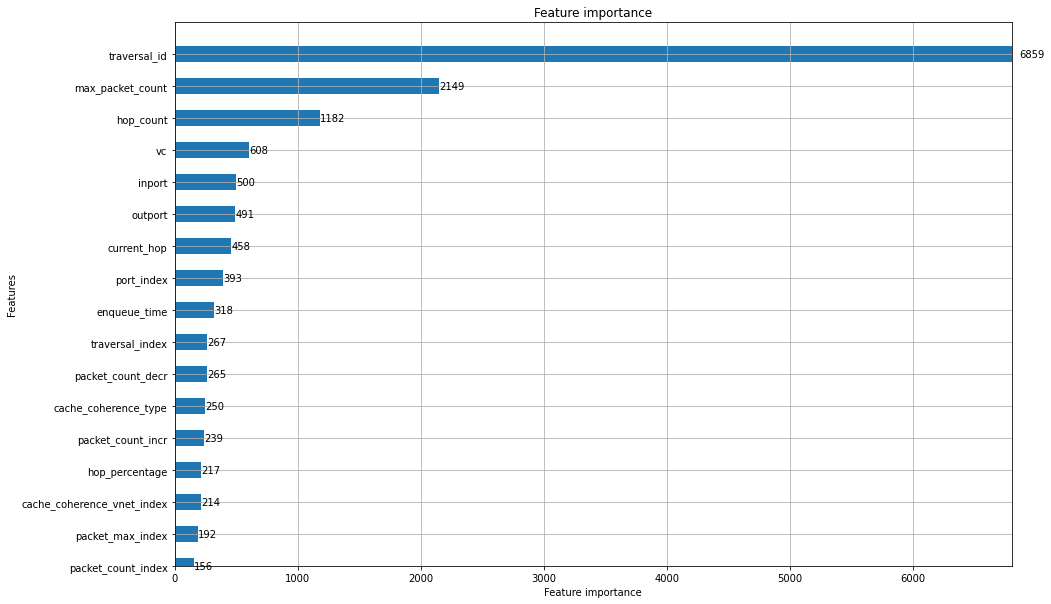

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[6859,
 2149,
 1182,
 608,
 500,
 491,
 458,
 393,
 318,
 267,
 265,
 250,
 239,
 217,
 214,
 192,
 156,
 63,
 59,
 45,
 40,
 35,
 0,
 0]

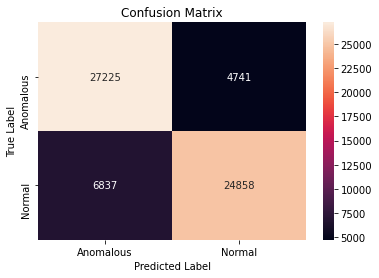

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     31966
           1       0.84      0.78      0.81     31695

    accuracy                           0.82     63661
   macro avg       0.82      0.82      0.82     63661
weighted avg       0.82      0.82      0.82     63661



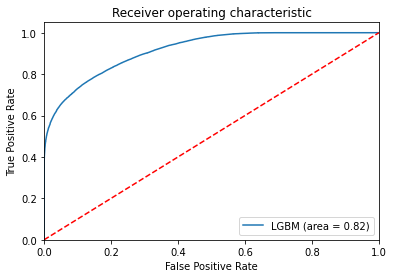

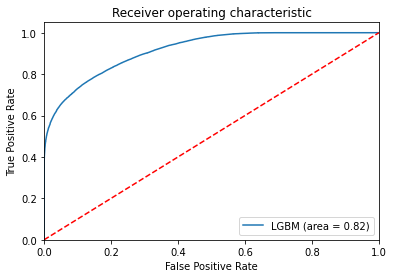

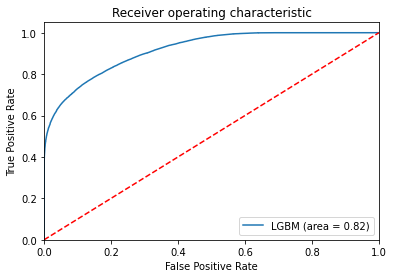

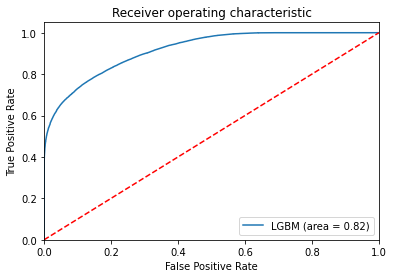

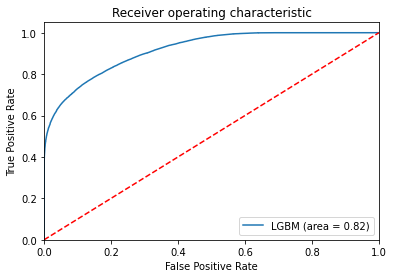

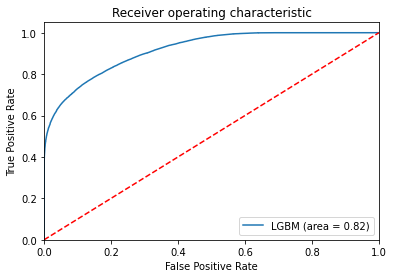

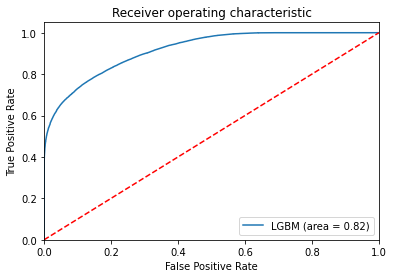

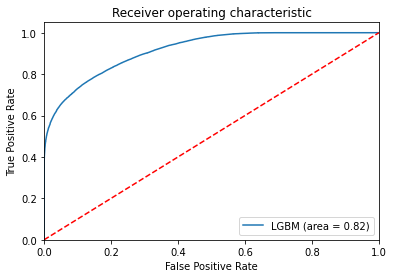

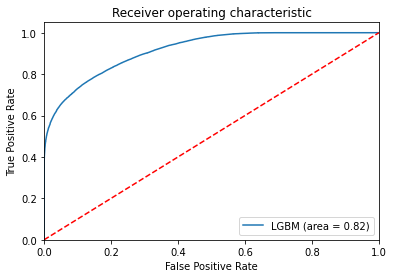

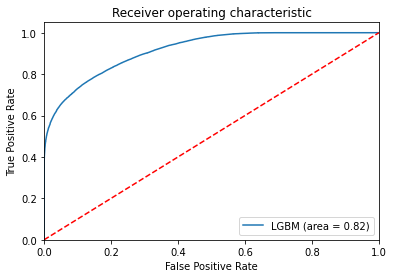

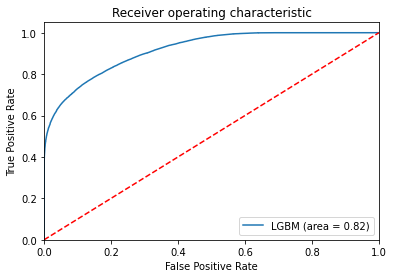

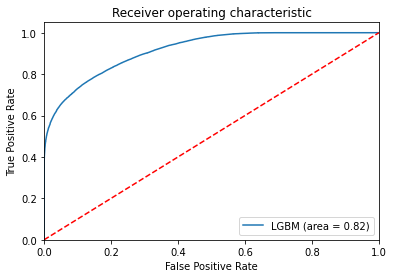

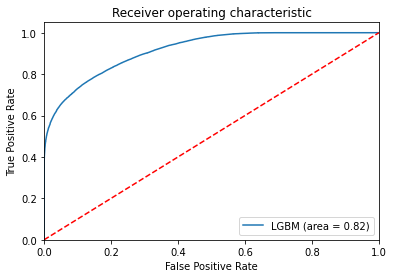

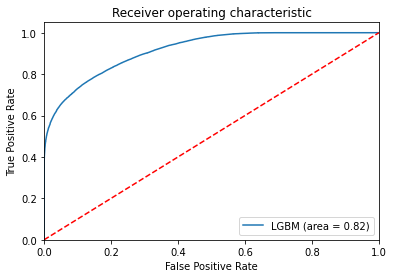

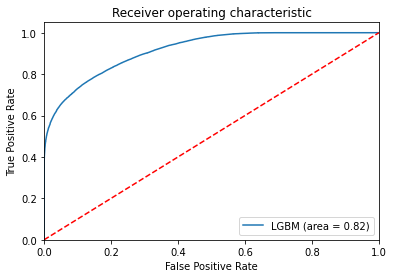

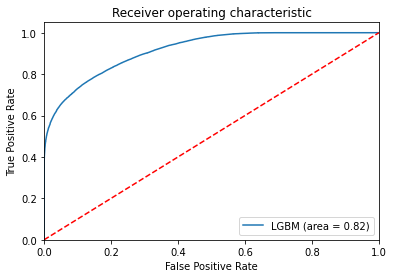

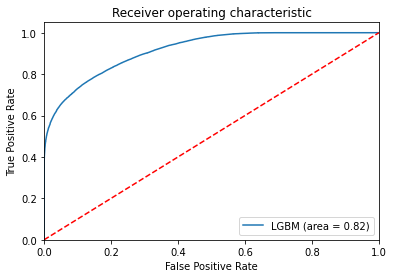

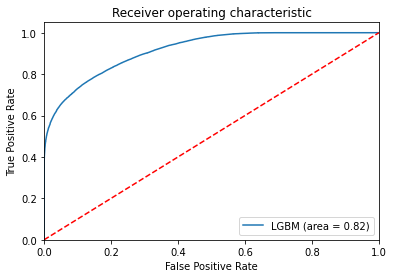

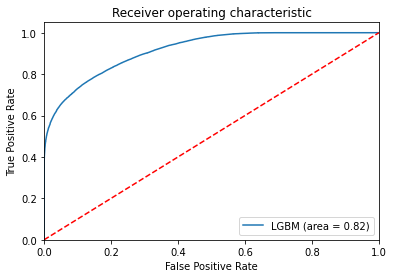

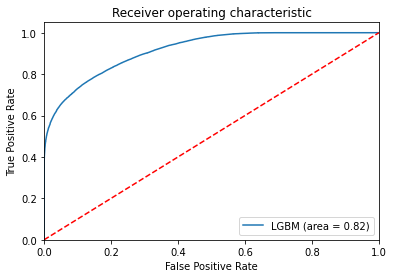

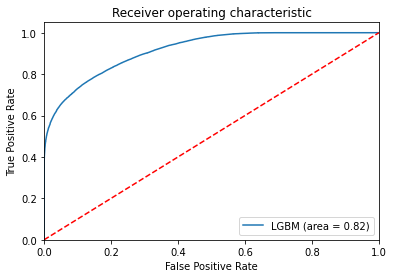

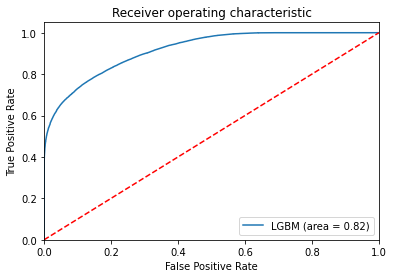

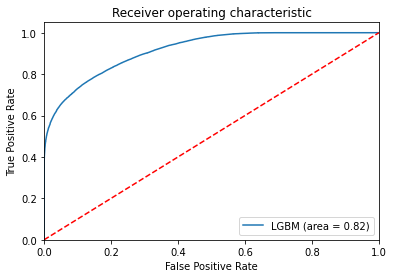

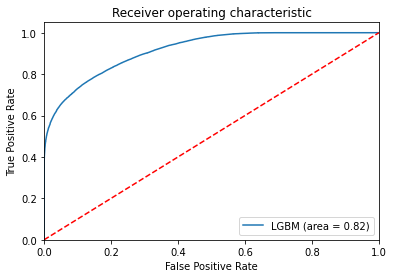

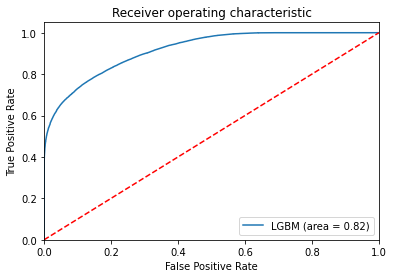

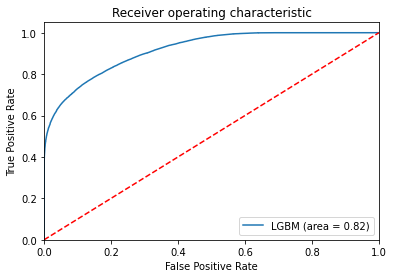

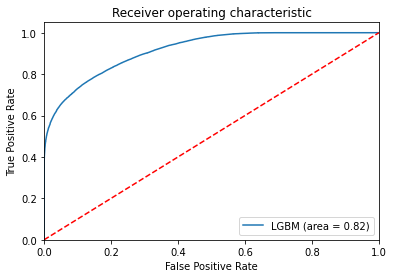

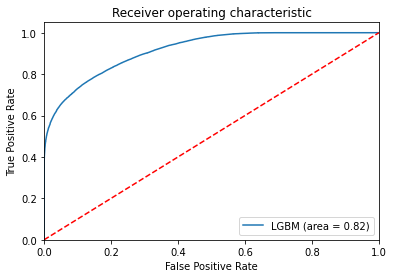

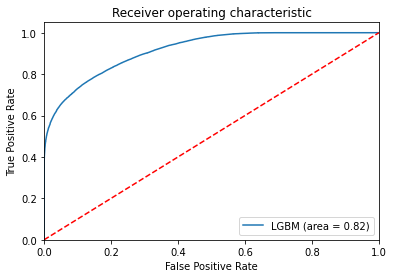

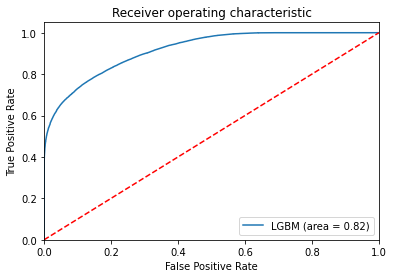

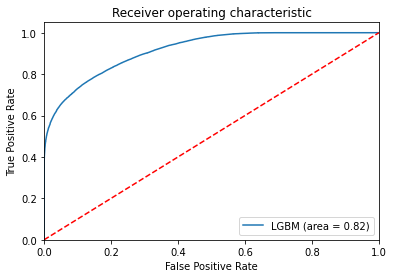

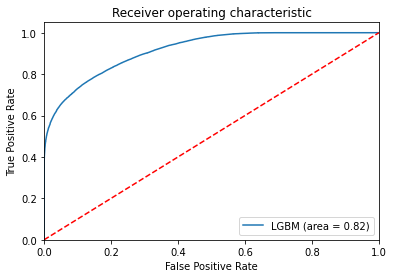

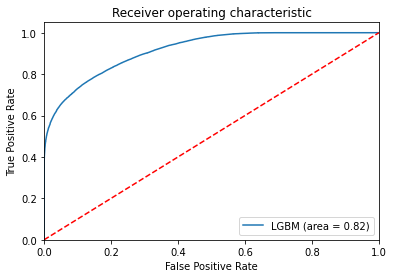

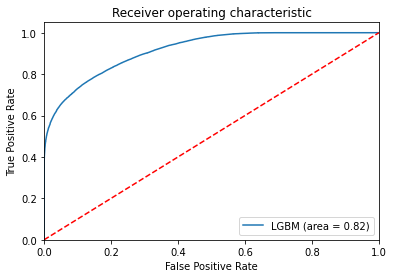

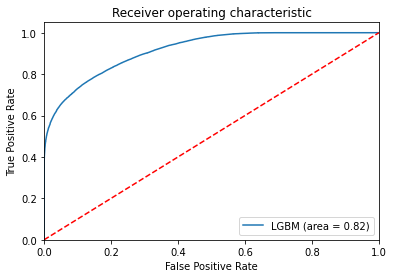

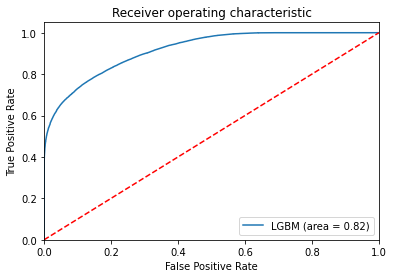

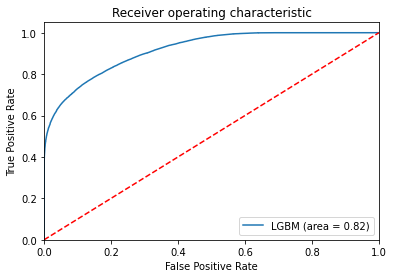

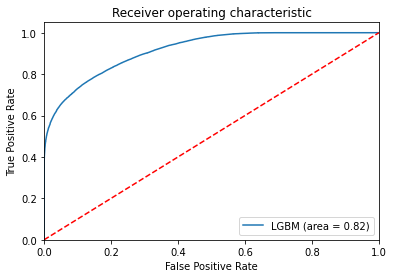

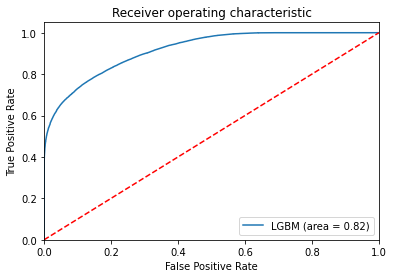

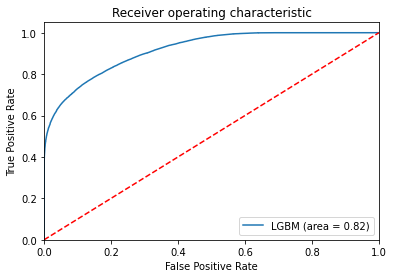

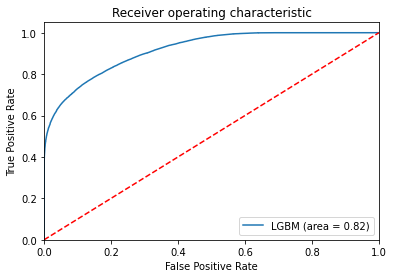

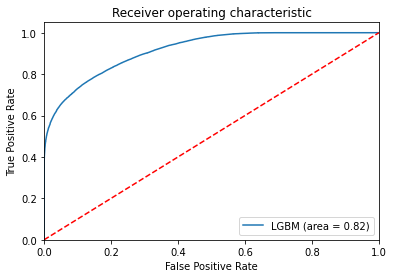

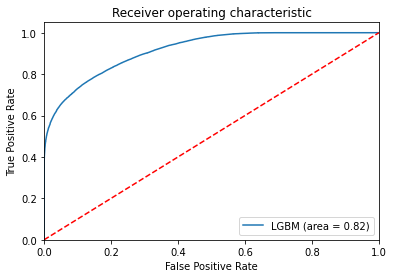

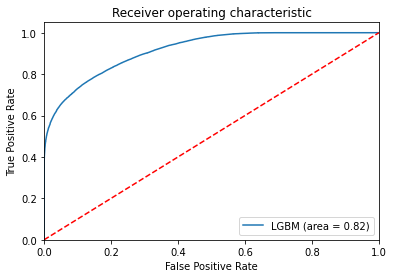

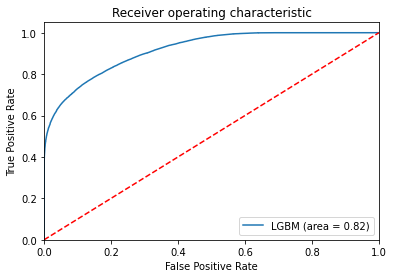

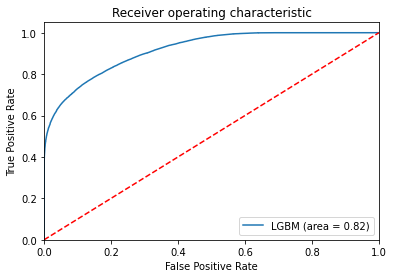

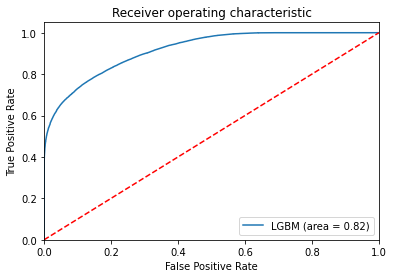

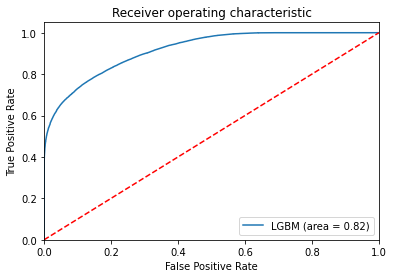

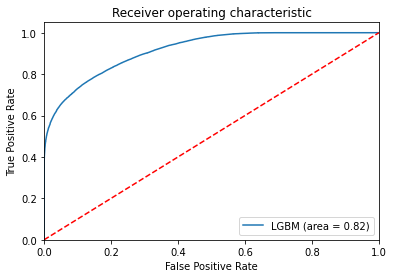

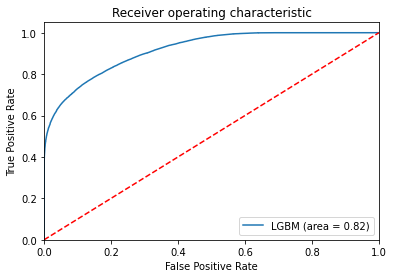

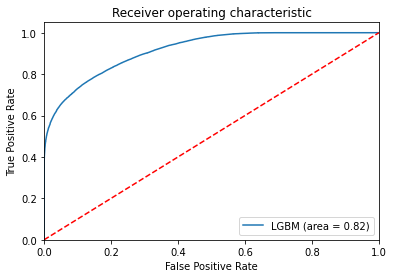

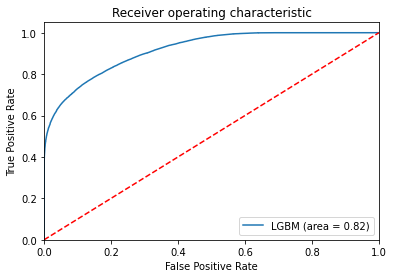

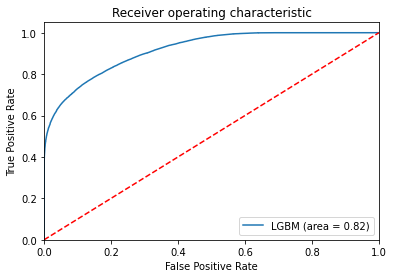

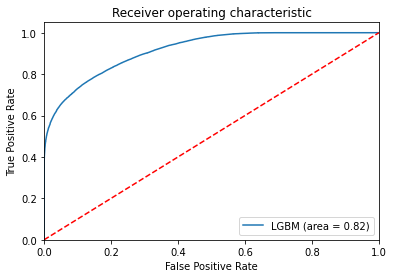

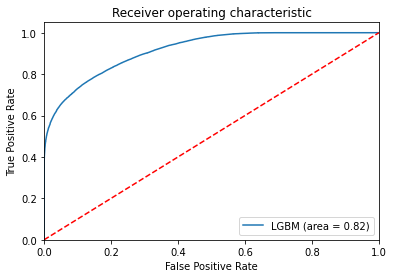

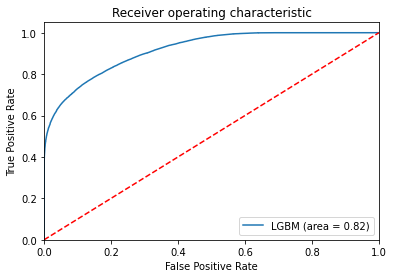

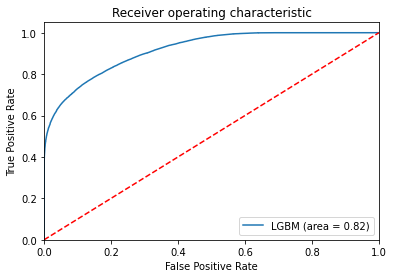

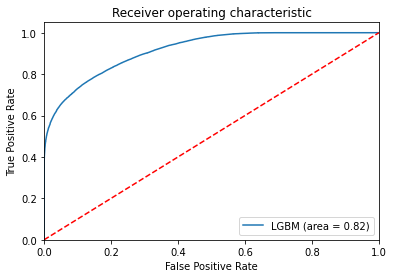

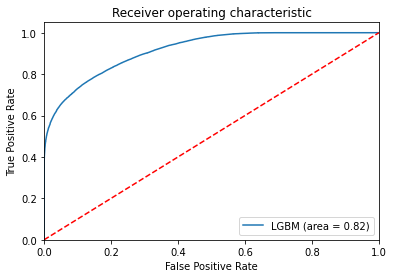

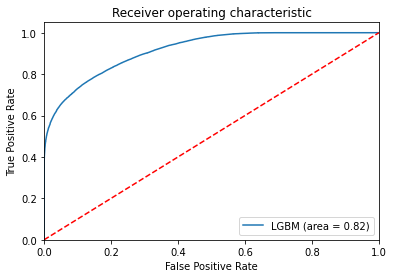

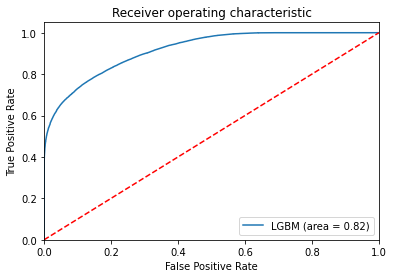

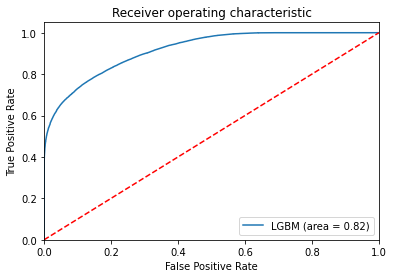

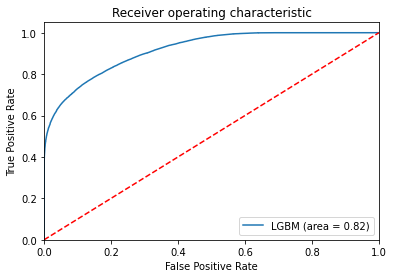

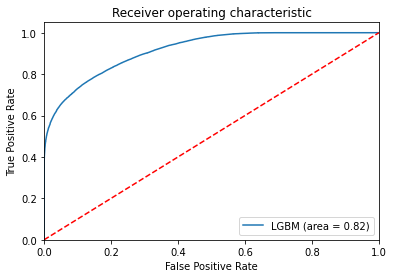

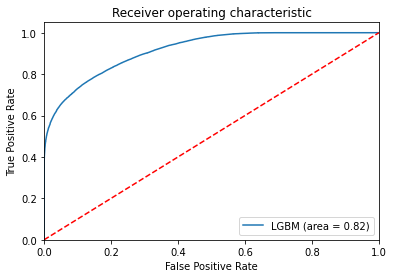

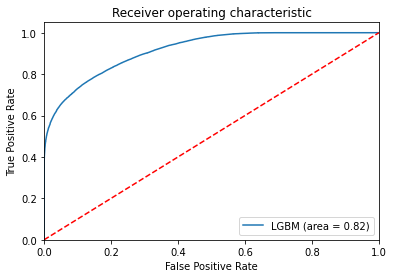

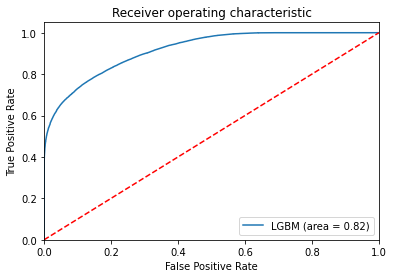

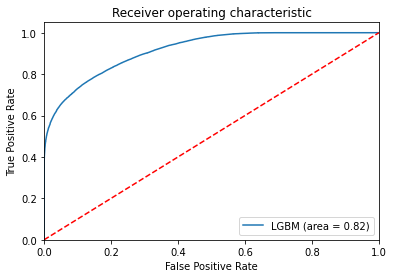

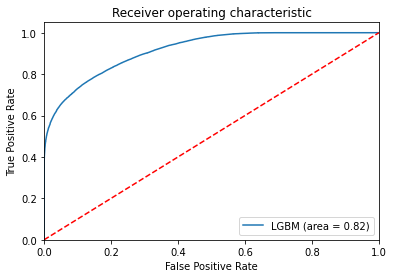

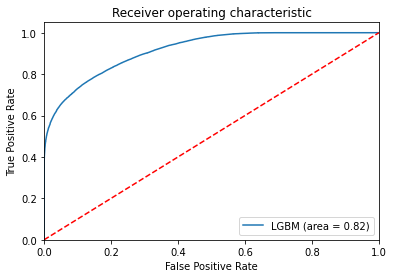

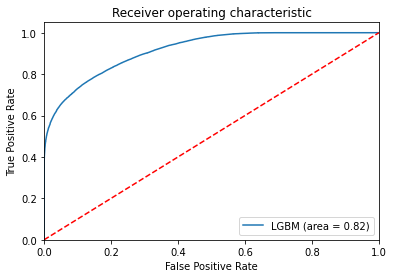

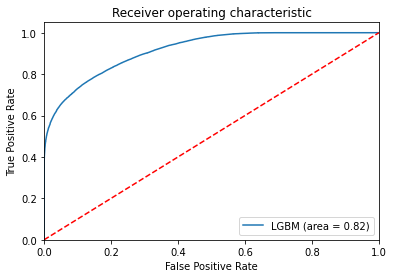

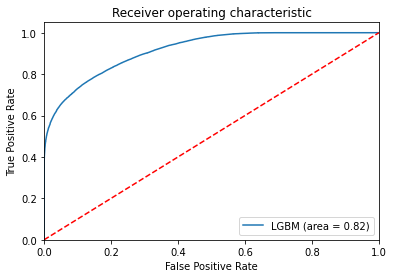

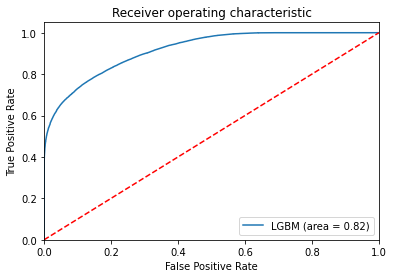

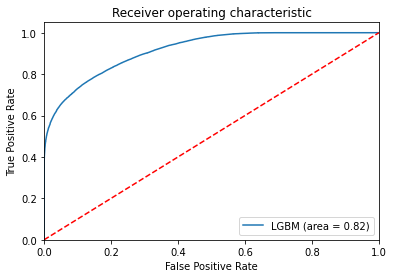

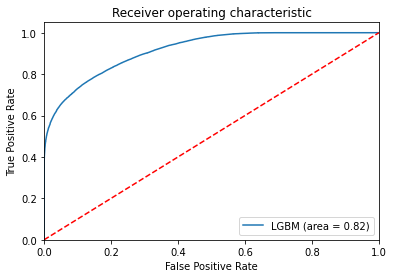

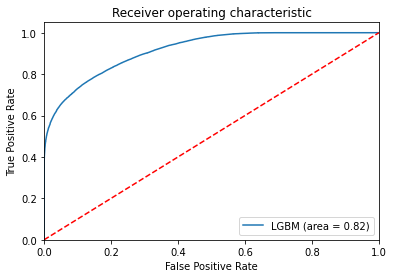

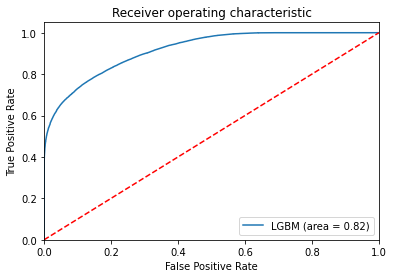

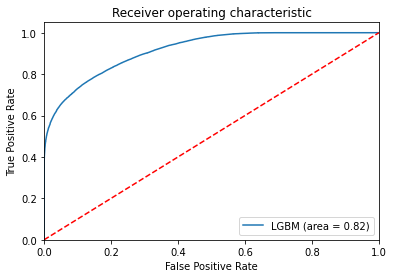

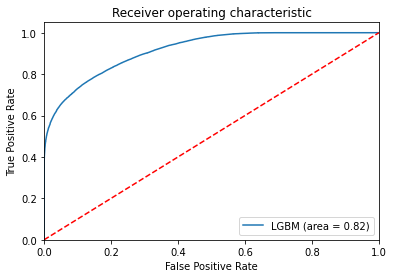

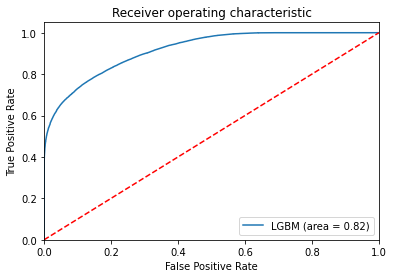

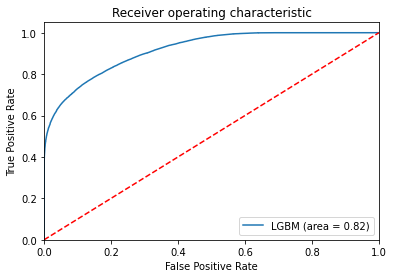

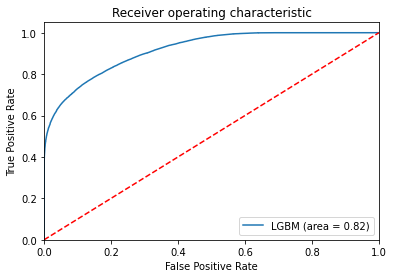

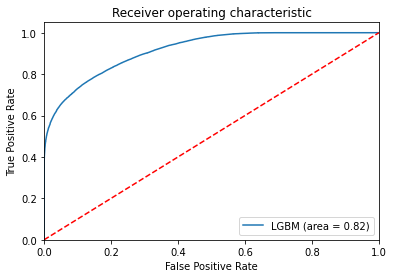

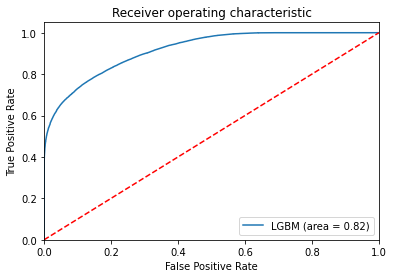

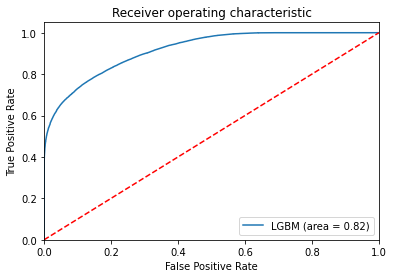

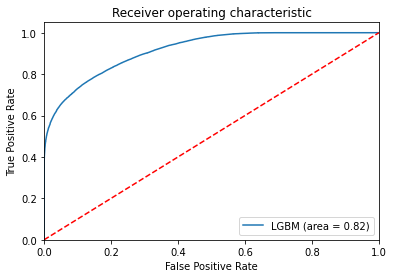

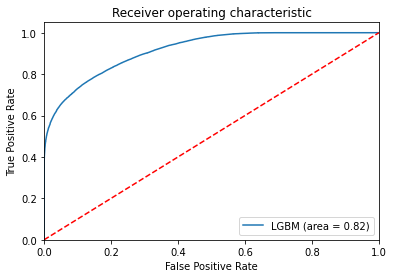

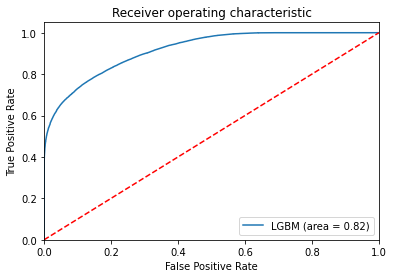

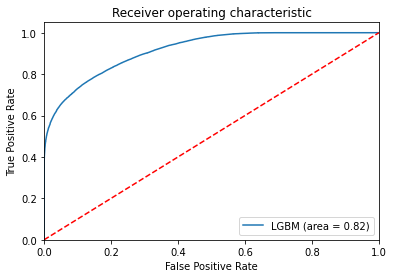

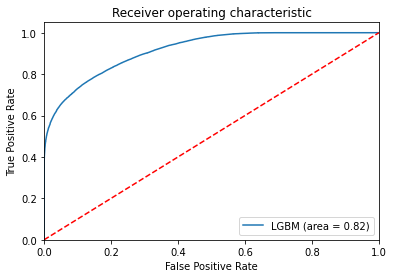

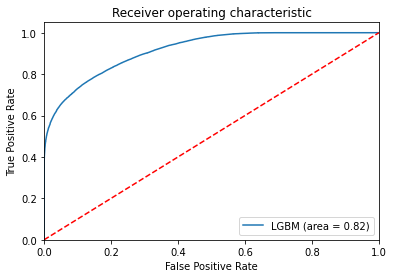

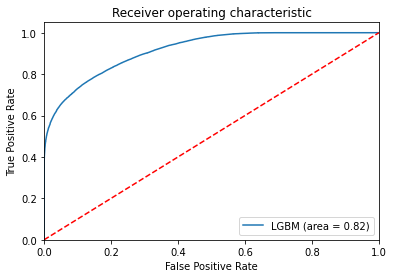

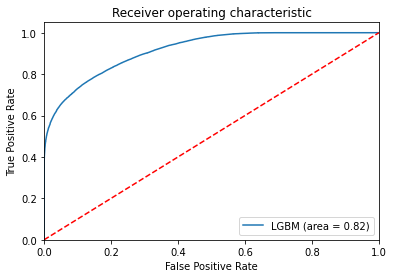

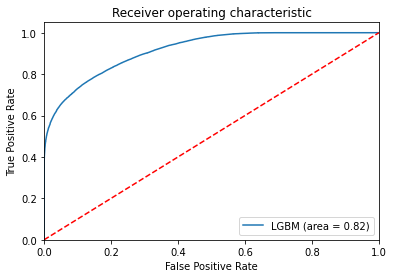

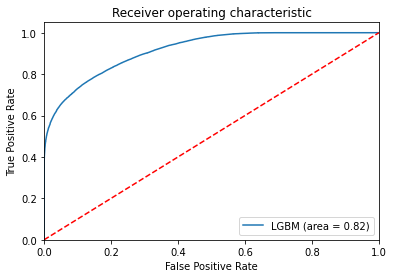

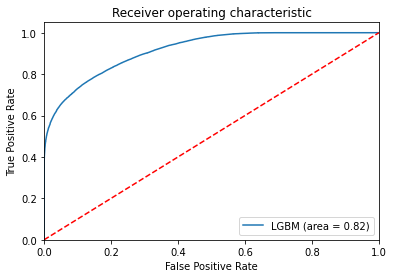

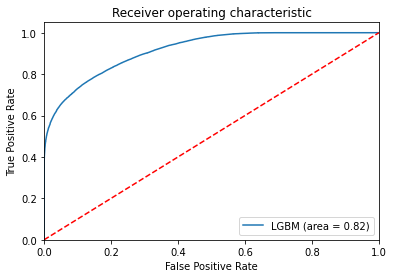

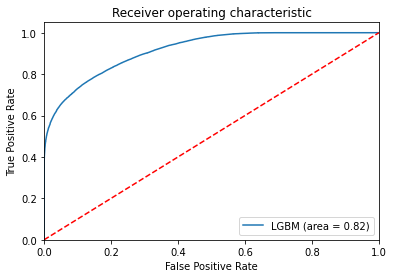

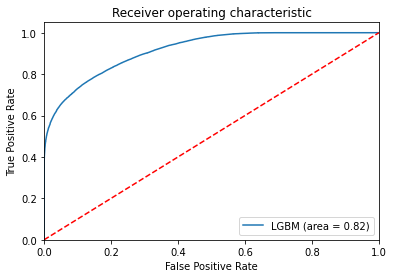

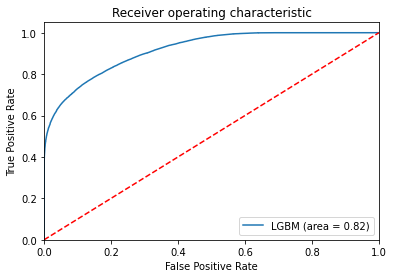

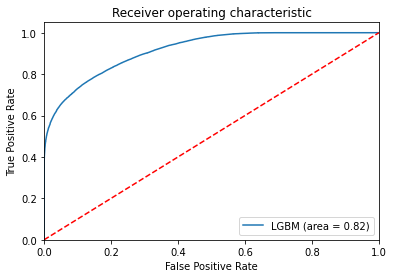

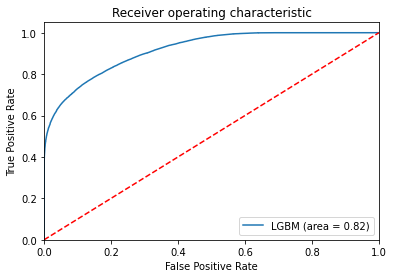

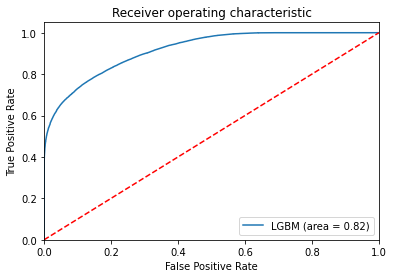

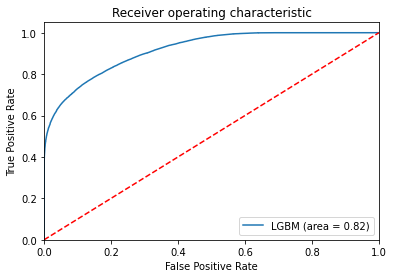

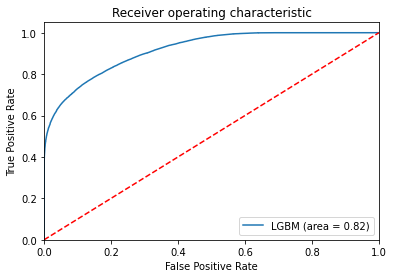

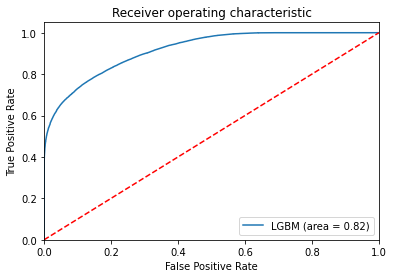

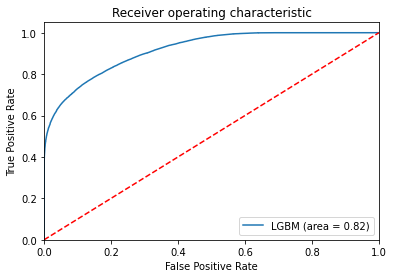

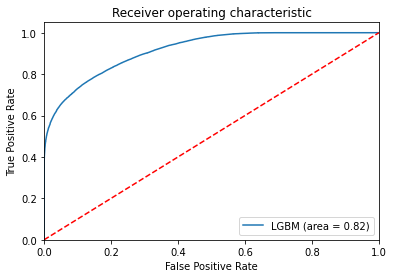

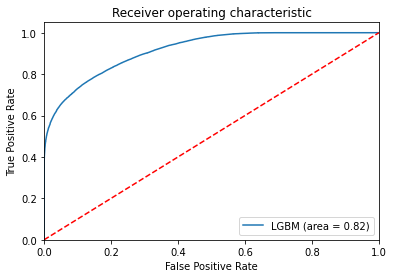

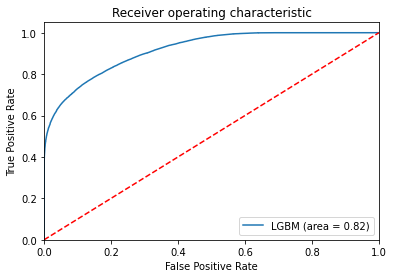

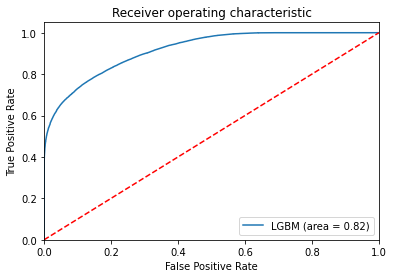

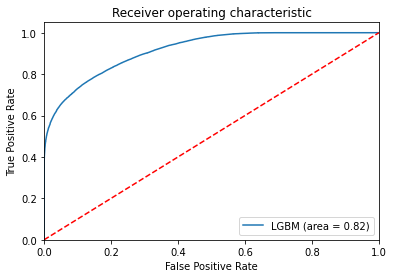

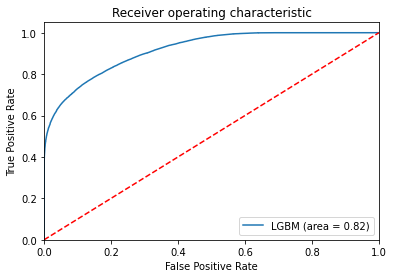

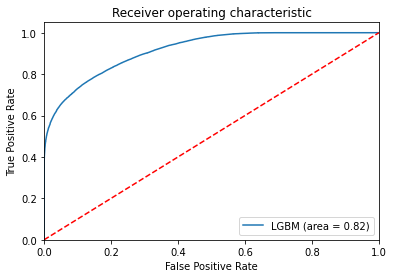

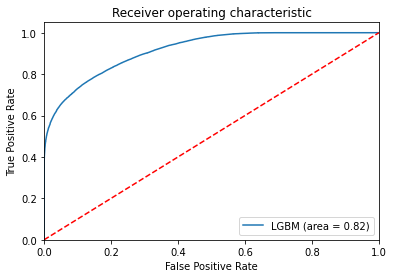

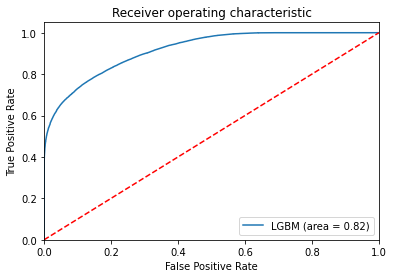

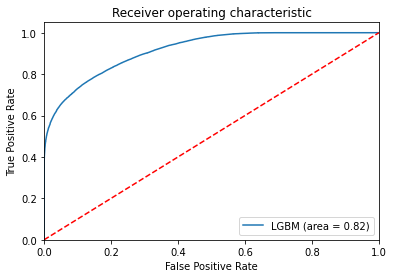

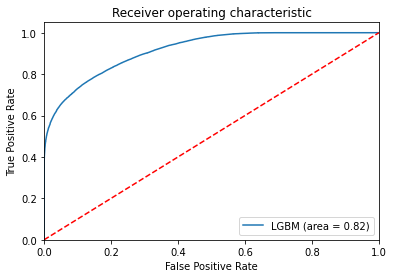

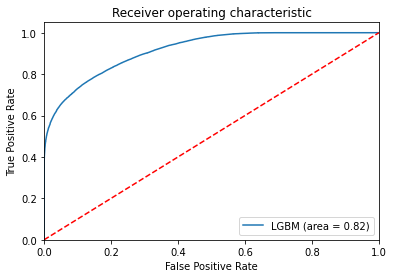

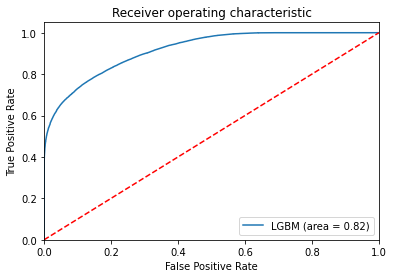

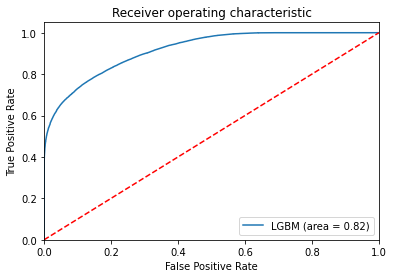

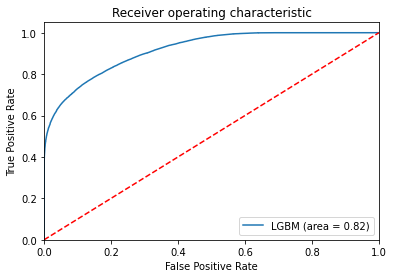

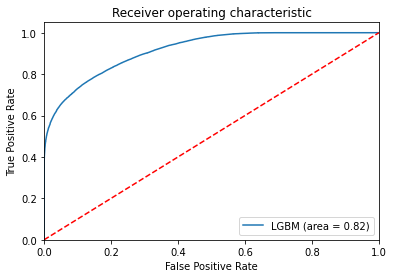

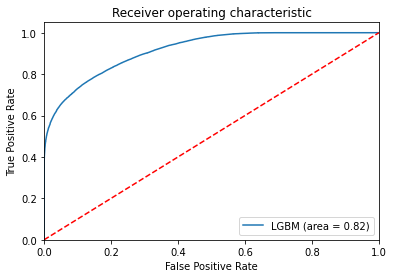

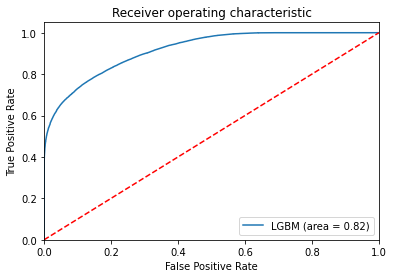

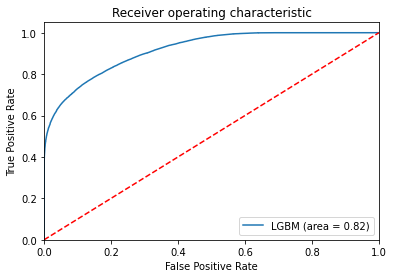

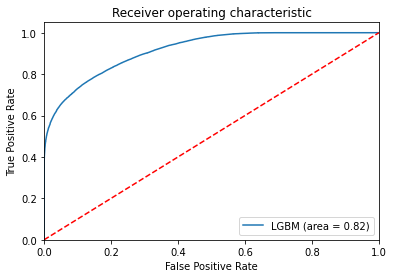

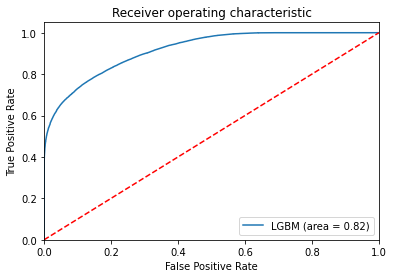

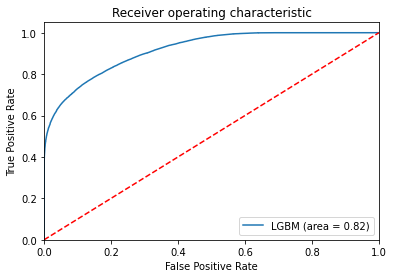

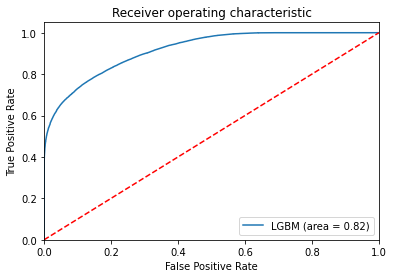

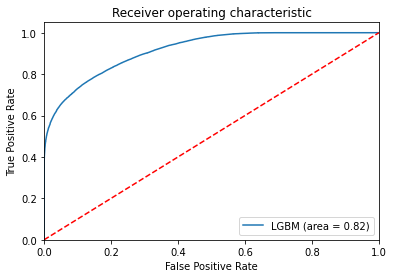

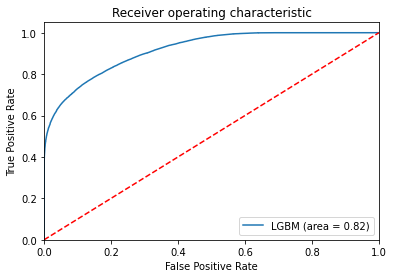

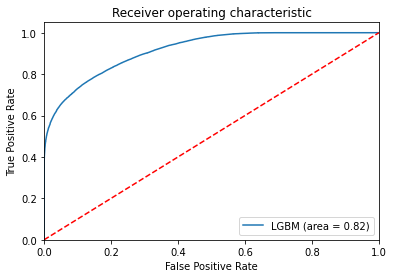

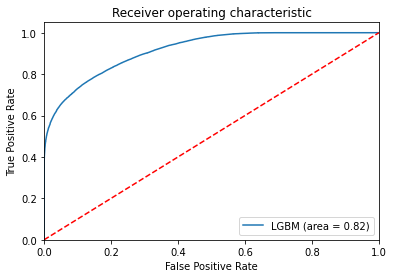

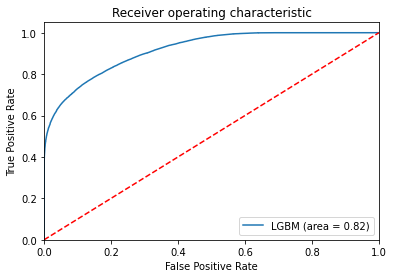

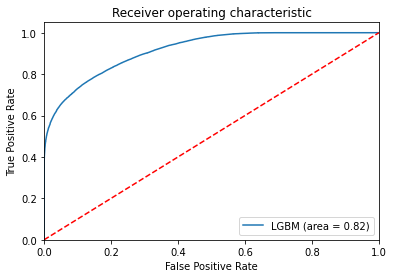

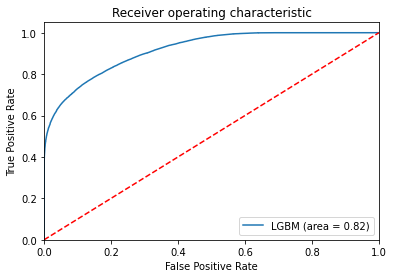

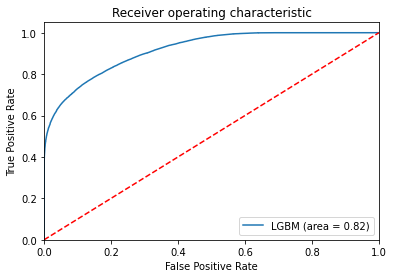

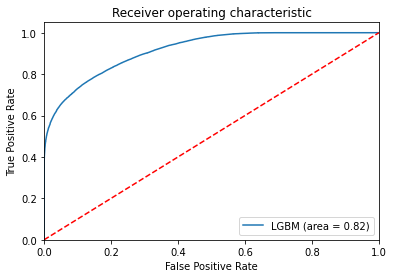

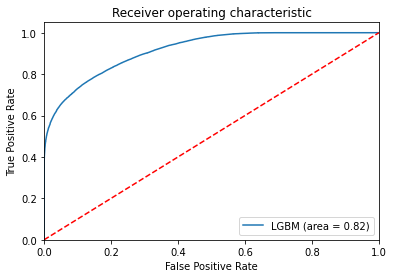

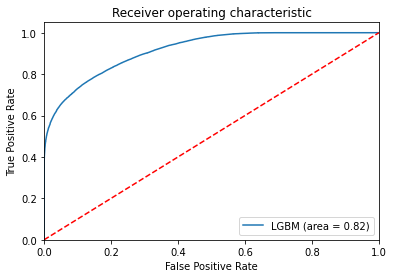

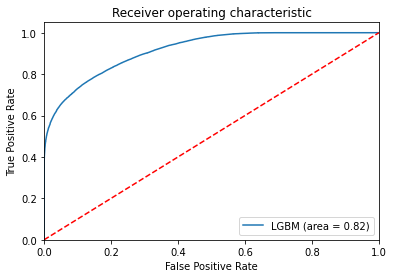

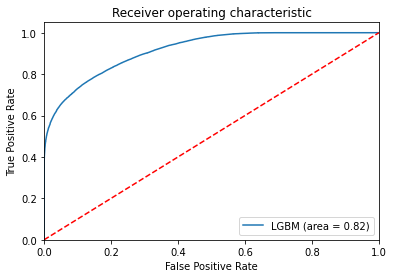

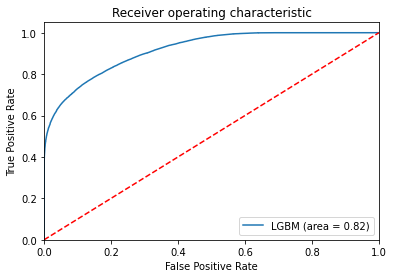

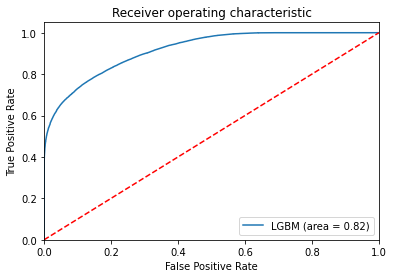

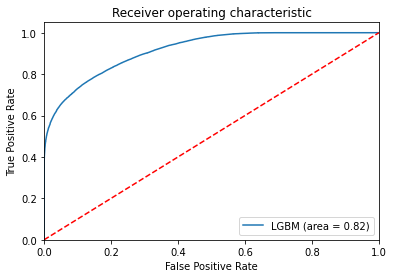

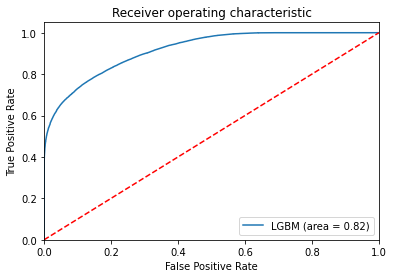

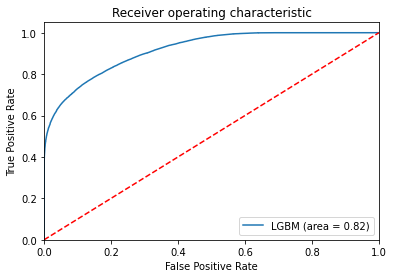

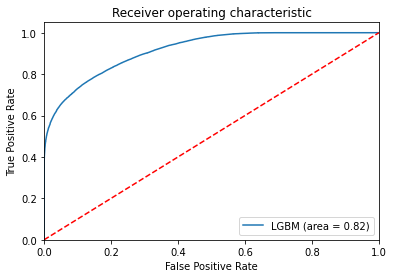

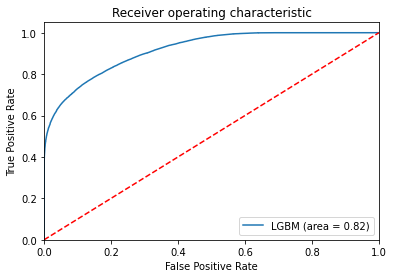

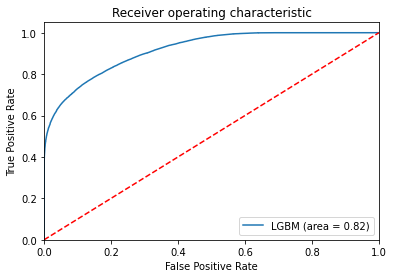

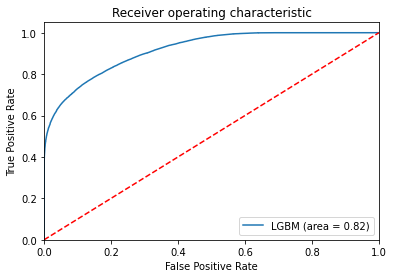

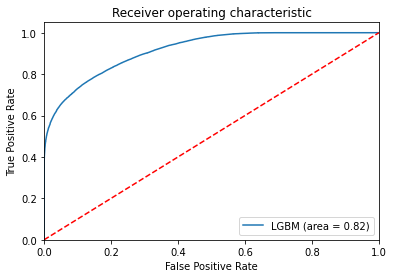

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()